In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

# 1️. Buat dataset sintetis dengan hubungan non-linear
np.random.seed(42)
n_samples = 500

X1 = np.random.uniform(4, 12, n_samples)  # Jam kerja (U-Shaped)
X2 = np.random.uniform(10, 90, n_samples) # Durasi istirahat (Inverted U)
X3 = np.random.uniform(1, 10, n_samples)  # Tingkat stres (Eksponensial)
X4 = np.random.randint(1, 15, n_samples)  # Jumlah tugas (Threshold Effect)
X5 = np.random.uniform(4, 10, n_samples)  # Kualitas tidur (Logaritmik)

# 2️. Definisikan hubungan non-linear terhadap produktivitas
Y = (
    - (X1 - 8) ** 2 +  # U-Shaped: Optimal di 8 jam kerja
    - (X2 - 45) ** 2 + # Inverted U: Optimal di 45 menit istirahat
    - (X3 - 3) ** 2 +  # Eksponensial: Optimal saat stres moderat
    - np.abs(X4 - 7) + # Threshold Effect: Optimal di 7 tugas
    np.log(X5 + 1) * 5 # Logaritmik: Meningkat lalu stagnan
) + np.random.normal(0, 3, n_samples)  # Tambahkan noise

# 3️. Buat DataFrame
df = pd.DataFrame({
    "Jam_Kerja": X1,
    "Durasi_Istirahat": X2,
    "Tingkat_Stres": X3,
    "Jumlah_Tugas": X4,
    "Kualitas_Tidur": X5,
    "Produktivitas": Y
})
df

,Jam_Kerja,Durasi_Istirahat,Tingkat_Stres,Jumlah_Tugas,Kualitas_Tidur,Produktivitas
0,6.996321,65.852937,2.666196,2,8.687023,-429.291311
1,11.605714,52.887709,5.877109,6,8.950793,-74.415284
2,9.855952,34.762209,8.856513,12,6.972713,-137.761423
3,8.789268,75.103602,7.590024,5,6.318093,-919.052357
4,5.248149,64.778494,8.259050,13,6.700747,-429.717933
...,...,...,...,...,...,...
495,6.826818,17.326566,7.013915,1,9.903042,-771.921596
496,8.669249,83.385086,6.575413,10,5.613754,-1478.427220
497,4.621877,20.945490,5.171446,2,6.441831,-585.520193
498,11.795158,86.018988,4.418072,10,9.348880,-1692.848985



📌 Mutual Information Scores:
         Feature  Mutual Information
Durasi_Istirahat            2.831963
    Jumlah_Tugas            0.013173
       Jam_Kerja            0.000000
   Tingkat_Stres            0.000000
  Kualitas_Tidur            0.000000


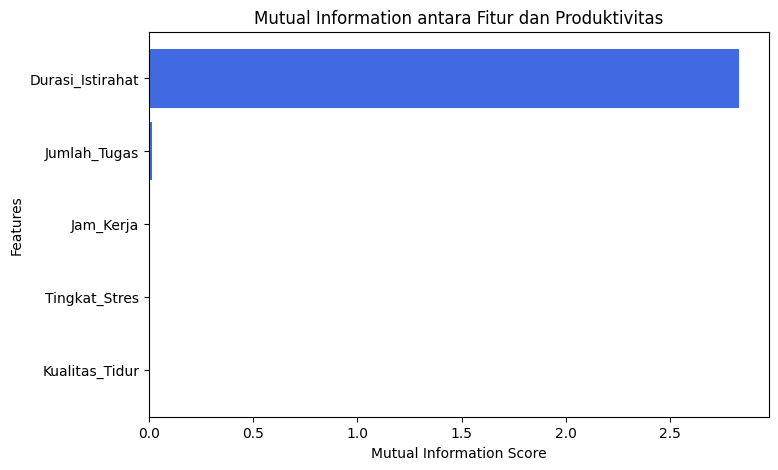

In [10]:
# 4️ Normalisasi data untuk perhitungan MI
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Produktivitas"]))
Y_scaled = scaler.fit_transform(df[["Produktivitas"]])

# 5️ Hitung Mutual Information (MI)
mi_scores = mutual_info_regression(X_scaled, Y_scaled.ravel())

# 6️ Buat DataFrame hasil MI
mi_df = pd.DataFrame({"Feature": df.columns[:-1], "Mutual Information": mi_scores})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

# 7️ Tampilkan hasil MI dalam bentuk tabel
print("\n📌 Mutual Information Scores:")
print(mi_df.to_string(index=False))

# 8️ Visualisasi hasil MI
plt.figure(figsize=(8, 5))
plt.barh(mi_df["Feature"], mi_df["Mutual Information"], color='royalblue')
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Mutual Information antara Fitur dan Produktivitas")
plt.gca().invert_yaxis()
plt.show()